<a href="https://colab.research.google.com/github/amitahire/Blog/blob/master/gaussian_splatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Splatting

Gaussian Splatting is a differentiable rasterization technique. It enables an ML-friendly representation of 3D.

Let's put it into practice with [LGM](https://huggingface.co/ashawkey/LGM).

## Setup

Install the required libraries.

In [3]:
!pip install -r https://huggingface.co/spaces/dylanebert/LGM-mini/raw/main/requirements.txt
!pip install https://huggingface.co/spaces/dylanebert/LGM-mini/resolve/main/wheel/diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.whl
!pip install xformers kiui

  Using cached tyro-0.9.31-py3-none-any.whl.metadata (11 kB)
  Using cached dearpygui-2.1.0-cp312-cp312-manylinux1_x86_64.whl.metadata (13 kB)
  Using cached lpips-0.1.4-py3-none-any.whl.metadata (10 kB)
  Using cached pygltflib-1.16.5-py3-none-any.whl.metadata (33 kB)
  Using cached spaces-0.40.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached trimesh-4.8.1-py3-none-any.whl.metadata (18 kB)
  Using cached kiui-0.2.18-py3-none-any.whl.metadata (4.4 kB)
  Using cached xatlas-0.0.11-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
  Using cached roma-1.5.4-py3-none-any.whl.metadata (5.5 kB)
  Using cached plyfile-1.1.2-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.2.0-cp312-cp312-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.17.0-cp312-cp312-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached torchaudio-2.2.0-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached xformers-0.0.32.post2-cp39-abi3-manylinux_2_28_x

# Pipeline

Create a multi-view diffusion pipeline, as in the previous notebook. This is the first step in LGM.

In [4]:
import torch
from diffusers import DiffusionPipeline

image_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

image_encoder/model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

mv_unet.py: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Expected types for unet: (<class 'diffusers_modules.local.dylanebert--multi-view-diffusion.3916e5568b2ee54ea8a81ce4961609158b2c464d.pipeline.MultiViewUNetModel'>,), got <class 'diffusers_modules.local.mv_unet.MultiViewUNetModel'>.


Then, create an LGM pipeline. This model generates a splat given multi-view images, and is the main contribution of the [LGM](https://huggingface.co/ashawkey/LGM) research project.

In [14]:
!git clone https://github.com/graphdeco-inria/diff-gaussian-rasterization.git
%cd diff-gaussian-rasterization
!pip install .
%cd ..

fatal: destination path 'diff-gaussian-rasterization' already exists and is not an empty directory.
/diff-gaussian-rasterization
Processing /diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for diff_gaussian_rasterization
  Running setup.py clean for diff_gaussian_rasterization
Failed to build diff_gaussian_rasterization
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (diff_gaussian_rasterization)
/


In [17]:
!pip install plyfile
splat_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/LGM",
    custom_pipeline="dylanebert/LGM",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

Keyword arguments {'trust_remote_code': True} are not expected by LGMPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/1 [00:00<?, ?it/s]

ImportError: This modeling file requires the following packages that were not found in your environment: diff_gaussian_rasterization. Run `pip install diff_gaussian_rasterization`

Load the input image.

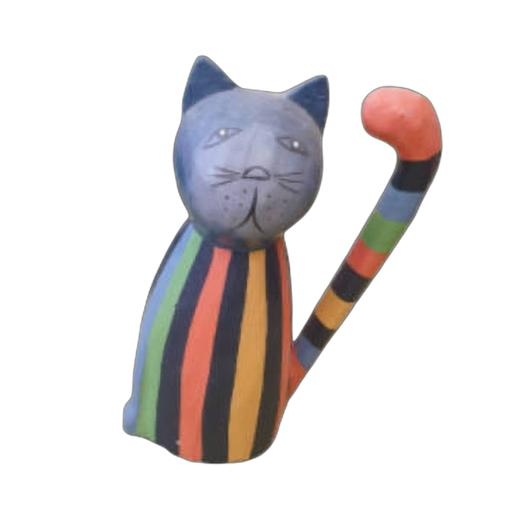

In [ ]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat_statue.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

Finally, pass the image through both pipelines. The result with be a matrix of splat data, which can be saved with `splat_pipeline.save_ply`.

The output will be saved to `/tmp/output.ply`, then downloaded using colab utilities.

In [ ]:
import numpy as np
from google.colab import files

input_image = np.array(image, dtype=np.float32) / 255.
multi_view_images = image_pipeline("", input_image, guidance_scale=5, num_inference_steps=30, elevation=0)
splat = splat_pipeline(multi_view_images)

output_path = "/tmp/output.ply"
splat_pipeline.save_ply(splat, output_path)
files.download(output_path)

  0%|          | 0/30 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Congratulations!

To view the `output.ply` splat file, upload it in a viewer like [gradio/model3D](https://huggingface.co/spaces/gradio/model3D).

Alternatively, for more advanced functionality (e.g. coordinate system correction, converting to `.splat`), upload it to an editor like [gsplat editor](https://huggingface.co/spaces/dylanebert/gsplat-editor) or [SuperSplat](https://playcanvas.com/supersplat/editor).

## Gradio Demo

In [ ]:
import gradio as gr

def run(image):
    input_image = image.astype("float32") / 255.0
    images = image_pipeline("", input_image, guidance_scale=5, num_inference_steps=30, elevation=0)
    splat = splat_pipeline(images)
    output_path = "/tmp/output.ply"
    splat_pipeline.save_ply(splat, output_path)
    return output_path

demo = gr.Interface(fn=run, inputs="image", outputs=gr.Model3D())
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ac295b1f95b39bdb31.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
